## Imports

Begin by importing the required libraries.

In [35]:
!pip install sklearn
!pip install seaborn
!pip install matplotlib

In [36]:
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt

Import the generated dataset.

In [37]:
data = pd.read_csv("mergeInsertionSortPart2.csv", header=0)

data.head()

,Threshold Size,Key comparisons,Execution time
0,10,1272043,0.024
1,110,3234119,0.031
2,210,5563088,0.061
3,310,5571162,0.051
4,410,10375113,0.080


## Empirical Analysis

In C(ii), we set the **array size** to be equal to 100000.

Plot the number of key comparisons against threshold size.

<AxesSubplot:xlabel='Threshold Size', ylabel='Key comparisons'>

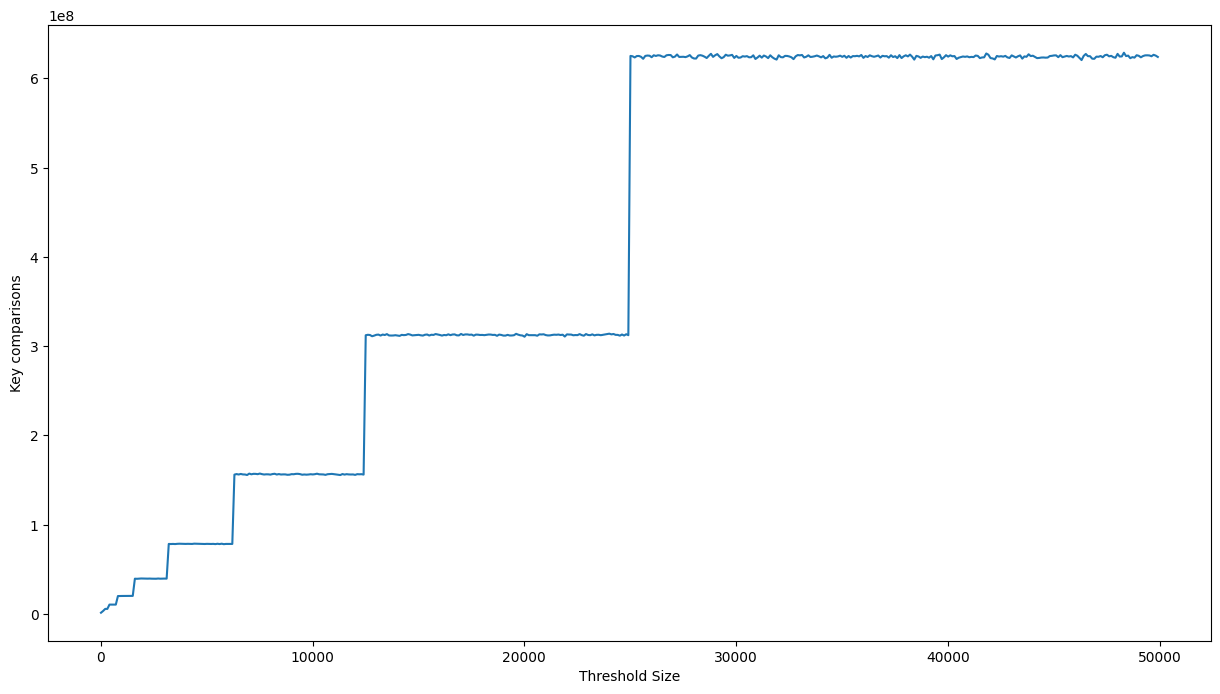

In [38]:
fig = plt.gcf()
fig.set_size_inches(15, 8)

sb.lineplot(data, x="Threshold Size", y="Key comparisons")

Plot the execution time against the array size.

<AxesSubplot:xlabel='Threshold Size', ylabel='Execution time '>

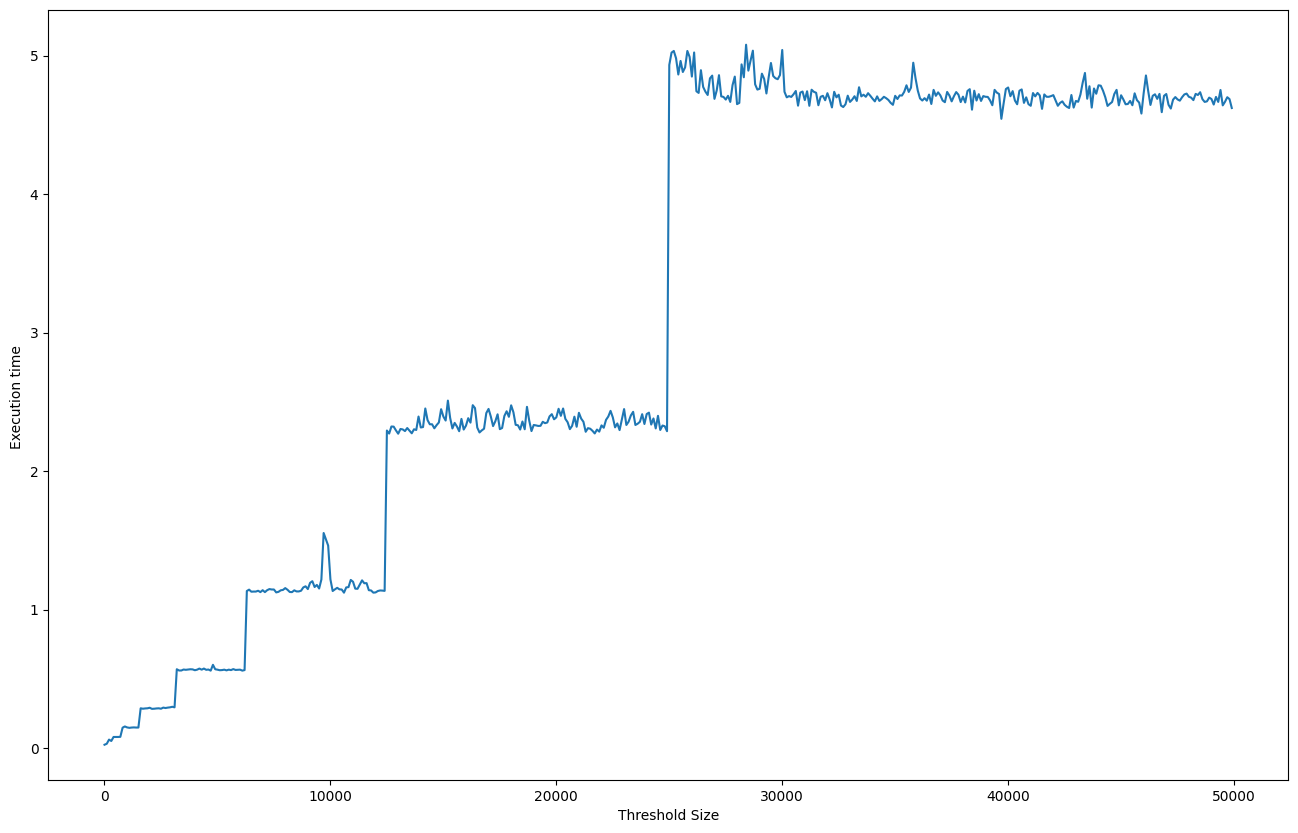

In [39]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data, x="Threshold Size", y="Execution time ")

Now, we compare with the traditional Merge Sort algorithm.

In [40]:
data2 = pd.read_csv("mergeSortPart2.csv", header=0)

data2.head()

,Threshold Size,Key comparisons,Execution time
0,10,1250828,0.034
1,110,1250268,0.033
2,210,1250673,0.031
3,310,1250337,0.031
4,410,1250401,0.032


<AxesSubplot:xlabel='Threshold Size', ylabel='Key comparisons'>

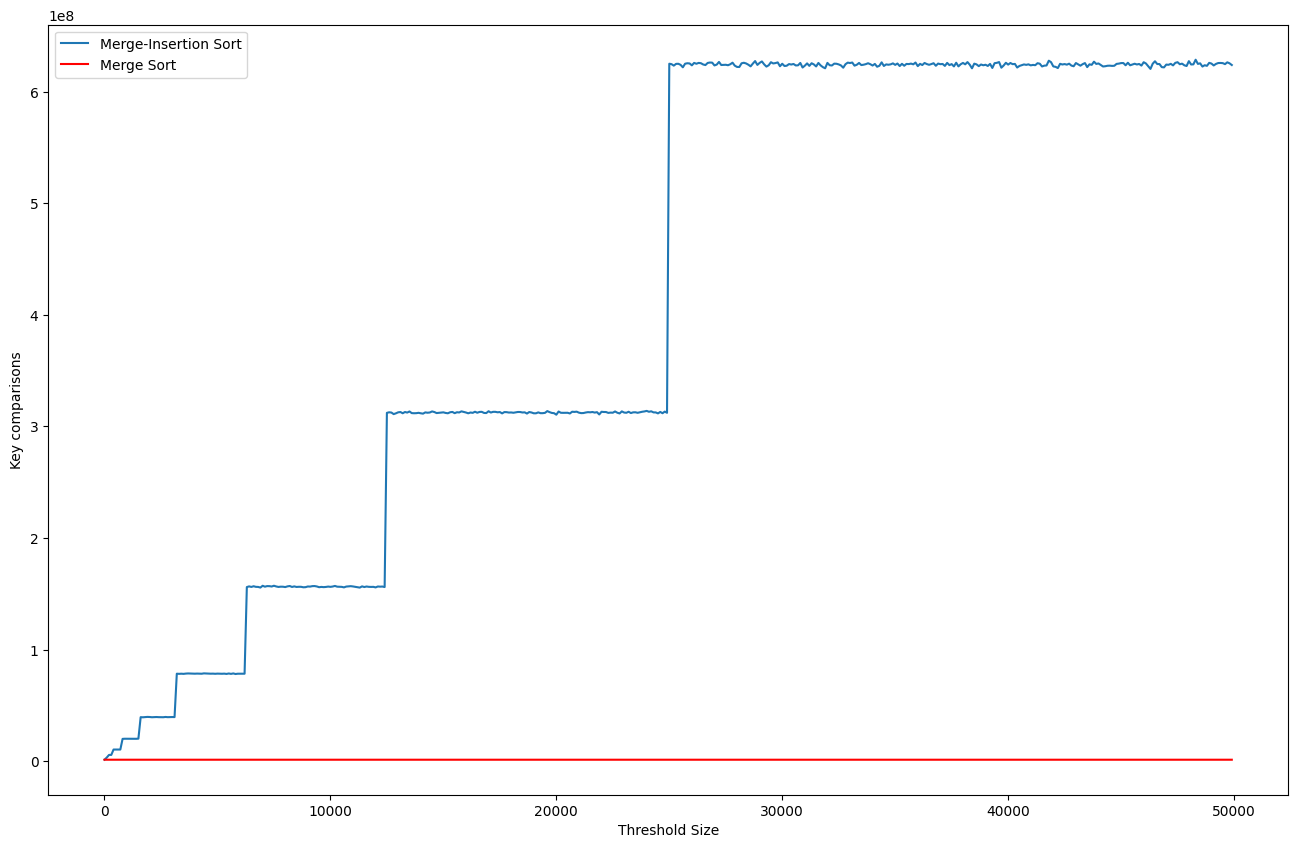

In [41]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data=data, x='Threshold Size', y='Key comparisons', label='Merge-Insertion Sort')
sb.lineplot(data=data2, x='Threshold Size', y='Key comparisons', color="red", label='Merge Sort')

<AxesSubplot:xlabel='Threshold Size', ylabel='Execution time '>

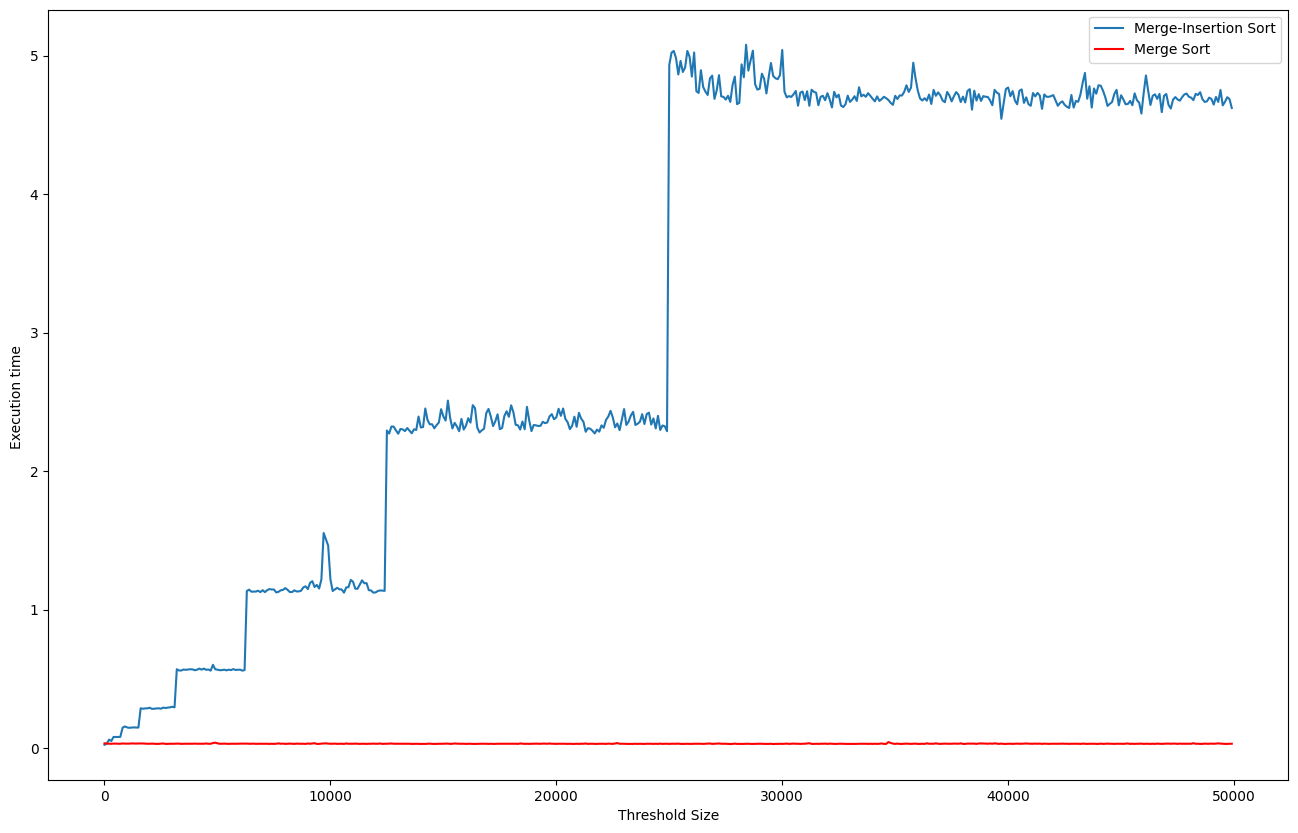

In [42]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data=data, x='Threshold Size', y='Execution time ', label='Merge-Insertion Sort')
sb.lineplot(data=data2, x='Threshold Size', y='Execution time ', color="red", label='Merge Sort')

We see that both the number of key comparisons and the execution time increases as the size of *s* increases. Thus, it is more useful to examine close-up on small values with small intervals.

In [62]:
data3 = pd.read_csv("mergeInsertionSortPart2a.csv", header=0)

data3.head()

,Threshold Size,Key comparisons,Execution time
0,1,1250828,0.034
1,2,1250268,0.031
2,3,1250673,0.031
3,4,1250337,0.030
4,5,1250401,0.031


[(0.0, 100.0)]

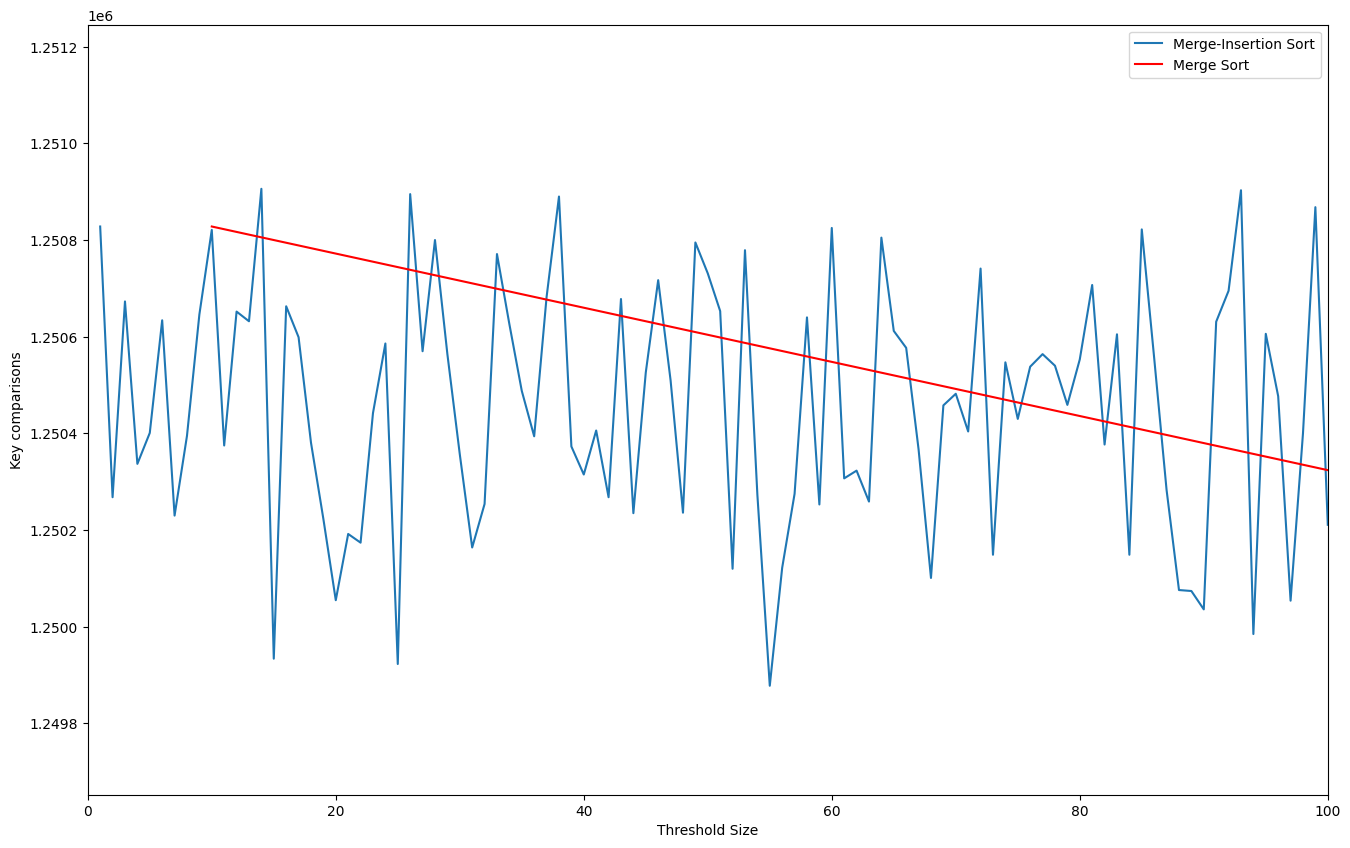

In [63]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data=data3, x='Threshold Size', y='Key comparisons', label='Merge-Insertion Sort').set(xlim=(0, 100))
sb.lineplot(data=data2, x='Threshold Size', y='Key comparisons', color="red", label='Merge Sort').set(xlim=(0, 100))

[(0.0, 100.0)]

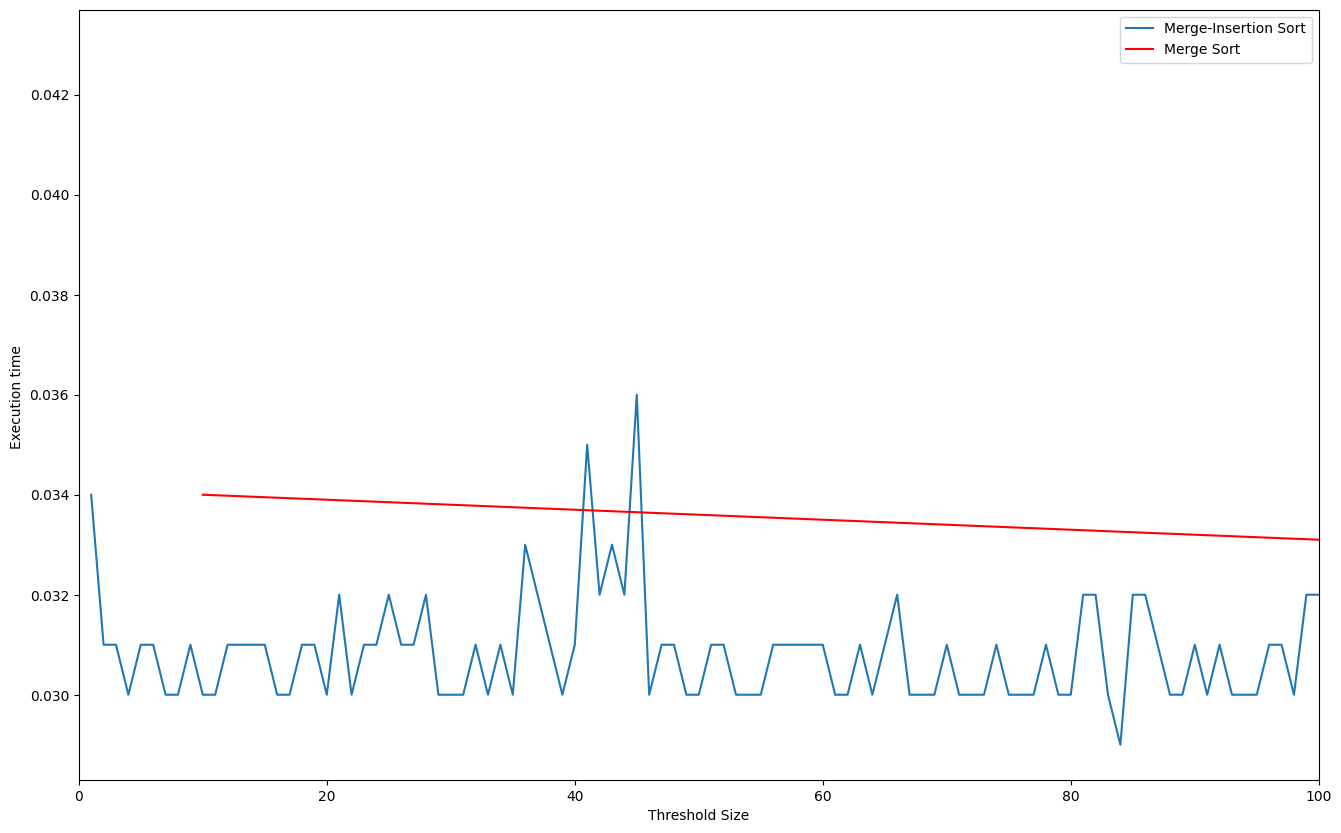

In [64]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data=data3, x='Threshold Size', y='Execution time ', label='Merge-Insertion Sort').set(xlim=(0, 100))
sb.lineplot(data=data2, x='Threshold Size', y='Execution time ', color="red", label='Merge Sort').set(xlim=(0, 100))

## Theoretical Analysis

From C(i) we have determined that for the hybrid Merge-Insertion Sort algorithm:

> The total time complexity for best-case analysis is: θ (*n* + *n* *log* (*n*/*s*)).
> <br>
> The total time complexity for worst and average-case analysis is: θ (*ns* + *n* *log* (*n*/*s*))

With the value of *n* fixed, the time complexity is simplified to θ (*log* *s*) for best-case and θ (*s* - *log* *s*) = θ (*s*) for average and worst-case.

The plot of number of key comparisons against the threshold size *s* presents a staircase pattern as expected. 

Consider an array of size *n*, and set the threshold to be *s* = *n*/*k*. The following binary tree structure illustrates the top-down approach of *mergesort* method.

<img src="Illustration.png">


When the *mergesort* method splits the array into *k* *n*/*k*-sized subarrays, the Insertion Sort method is called.

Now suppose we change the value of *s* to be such that 2*n*/*k* ≤ *s* ≤ *n*/*k*. Notice that since subarray of size 2*n*/*k* is bigger than *s*, the Insertion Sort algorithm will still be called on the level of array size *n*/*k*.

Now suppose we change the value of *s* to be 2*n*/*k*. Then, the Insertion Sort aalgorithm will be invoked on the level of array size 2*n*/*k* instead. 

This shows that whenever the value of *s* is between the array size of two adjacent levels in the binary tree structure, the number of Insertion Sort called is the same => the number of key comparisons is the same. This explains the **stagnant before sudden jump** pattern shown in the plot, where the **stagnant** portion is when 2*n*/*k* ≤ *s* ≤ *n*/*k* and the **sudden jump** portion is when *s* = 2*n*/*k* or *s* = *n*/*k*.

If we plot the value of *s* for all *s* in the set {*s* | *s* = *n*/2<sup>*k*</sup>}, then the plot will show a linear-time graph, as predicted in the time complexity analysis of θ (*s*).

In [66]:
data4 = pd.read_csv("mergeInsertionSortPart2b.csv", header=0)

data4.head()

,Threshold Size,Key comparisons,Execution time
0,1,1250828,0.031
1,2,1250097,0.024
2,4,1251110,0.024
3,8,1271836,0.023
4,16,1353482,0.020


<AxesSubplot:xlabel='Threshold Size', ylabel='Key comparisons'>

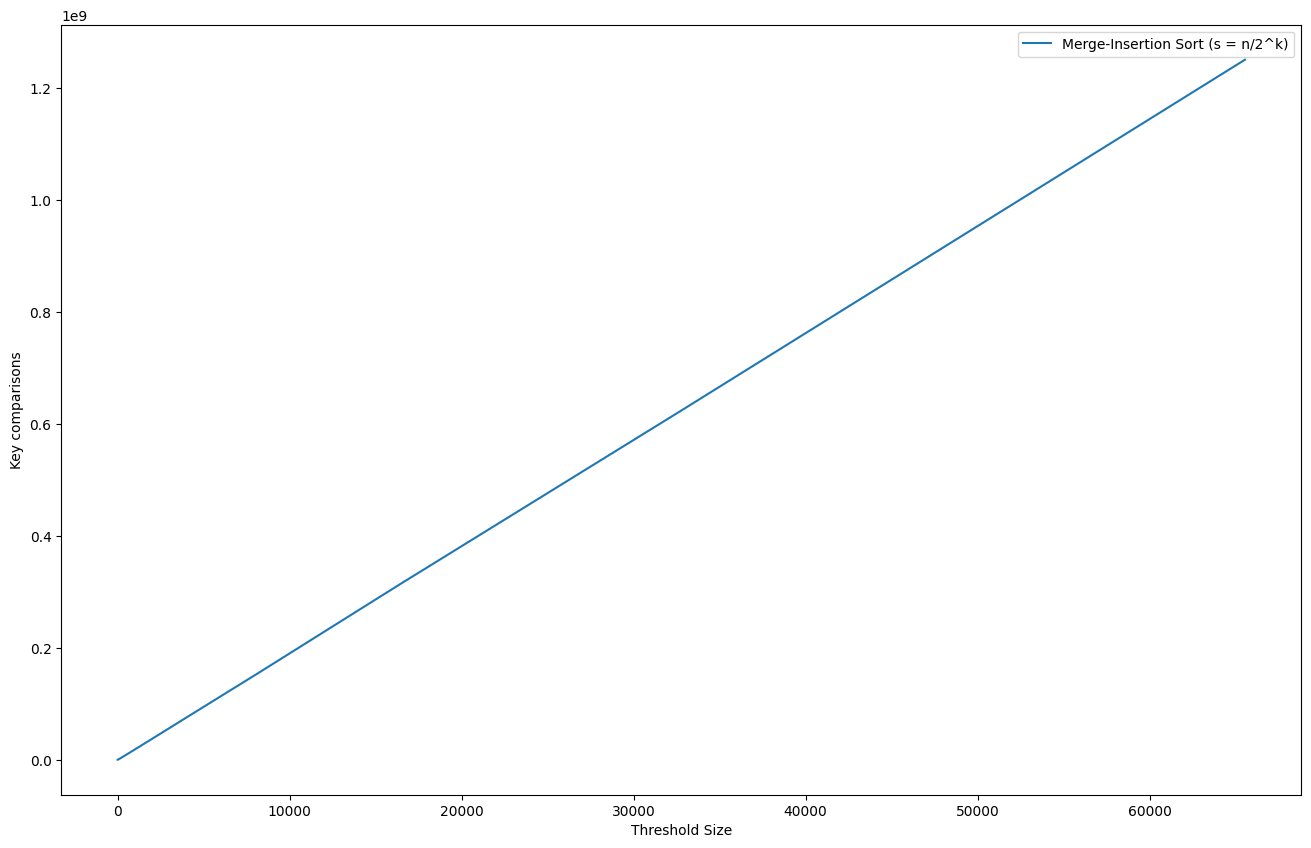

In [69]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data=data4, x='Threshold Size', y='Key comparisons', label='Merge-Insertion Sort (s = n/2^k)')